In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gempy as gp

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Repeated Normals DataFrame:
             x    y            z  normal_dx  normal_dy  normal_dz formation
0    33.069396    0  1016.459459  -0.440693          0   0.897658      fold
1    99.208189    0  1047.594739  -0.401000          0   0.916078      fold
2   165.346982    0  1073.572391  -0.319438          0   0.947607      fold
3   231.485774    0  1091.577333  -0.196054          0   0.980593      fold
4   297.624567    0  1099.658449  -0.041067          0   0.999156      fold
..         ...  ...          ...        ...        ...        ...       ...
85  297.624567  900  1099.658449  -0.041067          0   0.999156      fold
86  363.763360  900  1096.940027   0.121282          0   0.992618      fold
87  429.902153  900  1083.716648   0.262670          0   0.964886      fold
88  496.040945  900  1061.421271   0.365586          0   0.930778      fold
89  562.179738  900  1032.469947   0.425922          0   0.904760      fold

[90 rows x 7 columns]


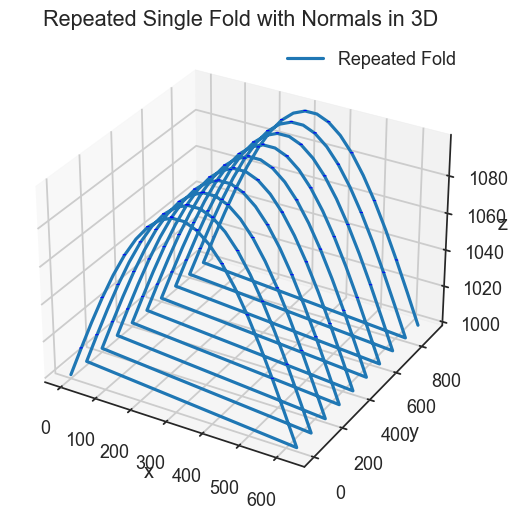

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 定义参数
A = 1  # 幅度
k = 0.5  # 波数
phi = 0  # 相位偏移
B = 10  # 基准高度

zoom = 100  # 放大倍数

# 定义 x 范围，控制范围使得只显示一个波峰
x = np.linspace(0, np.pi / k, 20)

# 定义 z 作为褶皱高度
z = A * np.sin(k * x + phi) + B

# 重复 x 和 z 各 10 次
x_repeated = np.tile(x, 10)*zoom
z_repeated = np.tile(z, 10)*zoom

# 定义 y 为全零数组并重复 10 次，每次加 1
y = np.zeros_like(x)
y_repeated = np.tile(y, 10)  # 首先重复原始的 y
increments = np.repeat(np.arange(10), len(x))  # 创建每次加 1 的数组
y_repeated = y_repeated + increments  # 每次加 1
y_repeated = y_repeated*zoom
formation = pd.DataFrame(data={'formation': ['fold'] * 500})


# 创建一个 DataFrame 保存重复的点
points_df = pd.DataFrame({'x': x_repeated, 'y': y_repeated, 'z': z_repeated,'formation': ['fold'] * len(x_repeated)})

# 计算每个点的法向量
normals = []

for i in range(1, len(x) - 1, 2):  # 每隔几个点进行法向量计算
    # 获取当前点及其梯度
    dx = x[i + 1] - x[i - 1]  # x 方向上的差异
    dz = z[i + 1] - z[i - 1]  # z 方向上的差异
    
    # 计算垂直于梯度方向的法向方向
    normal_dx = -dz  # 法向量在 x 方向的分量
    normal_dy = 0    # 法向量在 y 方向的分量，总是为 0
    normal_dz = dx   # 法向量在 z 方向的分量

    # 归一化法向量长度以控制箭头大小
    norm_length = np.sqrt(normal_dx**2 + normal_dz**2)
    normal_dx /= norm_length
    normal_dz /= norm_length

    # 将法向量添加到列表中
    normals.append({'x': x_repeated[i], 'y': 0, 'z': z_repeated[i], 'normal_dx': normal_dx, 'normal_dy': normal_dy, 'normal_dz': normal_dz, 'formation': 'fold'})

# 创建 DataFrame 保存法向量
normals_df = pd.DataFrame(normals)

# 重复 normals_df
normals_repeated = pd.concat([normals_df] * 10, ignore_index=True)

# 为每个法向量添加 y 方向的偏移（类似于 points_df）
normals_repeated['y'] = np.repeat(np.arange(10), len(normals_df))*100

# 打印重复后的 DataFrame
print("Repeated Normals DataFrame:")
print(normals_repeated)

# 绘制原始曲线和法向量
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_repeated, y_repeated, z_repeated, label='Repeated Fold')

# 在3D图中绘制重复的法向量
for i in range(len(normals_repeated)):
    row = normals_repeated.iloc[i]
    ax.quiver(row['x'], row['y'], row['z'], row['normal_dx'], row['normal_dy'], row['normal_dz'], length=0.5, color='blue')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Repeated Single Fold with Normals in 3D')
plt.legend()
plt.show()


In [7]:
normals_repeated

,x,y,z,normal_dx,normal_dy,normal_dz,formation
0,33.069396,0,1016.459459,-0.440693,0,0.897658,fold
1,99.208189,0,1047.594739,-0.401000,0,0.916078,fold
2,165.346982,0,1073.572391,-0.319438,0,0.947607,fold
3,231.485774,0,1091.577333,-0.196054,0,0.980593,fold
4,297.624567,0,1099.658449,-0.041067,0,0.999156,fold
...,...,...,...,...,...,...,...
85,297.624567,900,1099.658449,-0.041067,0,0.999156,fold
86,363.763360,900,1096.940027,0.121282,0,0.992618,fold
87,429.902153,900,1083.716648,0.262670,0,0.964886,fold
88,496.040945,900,1061.421271,0.365586,0,0.930778,fold


In [8]:
points_df

,x,y,z,formation
0,0.000000,0.0,1000.000000,fold
1,33.069396,0.0,1016.459459,fold
2,66.138793,0.0,1032.469947,fold
3,99.208189,0.0,1047.594739,fold
4,132.277585,0.0,1061.421271,fold
...,...,...,...,...
195,496.040945,900.0,1061.421271,fold
196,529.110342,900.0,1047.594739,fold
197,562.179738,900.0,1032.469947,fold
198,595.249134,900.0,1016.459459,fold


In [9]:
x_min = points_df['x'].min()
x_max = points_df['x'].max()
y_min = points_df['y'].min()
y_max = points_df['y'].max()
z_min = points_df['z'].min()
z_max = points_df['z'].max()

In [10]:
geo_model = gp.create_model('fold')
gp.init_data(geo_model, [x_min,x_max,y_min,y_max,z_min-10,z_max+10], [50, 50, 50],
                surface_points_df=points_df,
                default_values=False)
geo_model.add_surfaces('basement')
for i in range(len(normals_repeated)):
    geo_model.add_orientations(normals_repeated['x'][i], normals_repeated['y'][i], normals_repeated['z'][i],normals_repeated['formation'][i] ,[normals_repeated['normal_dx'][i], normals_repeated['normal_dy'][i], normals_repeated['normal_dz'][i]])  


Active grids: ['regular']


In [11]:
geo_model.orientations

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,33.069396,0.0,1016.459459,-0.440693,0.0,0.897658,0.01,fold
1,99.208189,0.0,1047.594739,-0.401000,0.0,0.916078,0.01,fold
2,165.346982,0.0,1073.572391,-0.319438,0.0,0.947607,0.01,fold
3,231.485774,0.0,1091.577333,-0.196054,0.0,0.980593,0.01,fold
4,297.624567,0.0,1099.658449,-0.041067,0.0,0.999156,0.01,fold
5,363.763360,0.0,1096.940027,0.121282,0.0,0.992618,0.01,fold
6,429.902153,0.0,1083.716648,0.262670,0.0,0.964886,0.01,fold
7,496.040945,0.0,1061.421271,0.365586,0.0,0.930778,0.01,fold
8,562.179738,0.0,1032.469947,0.425922,0.0,0.904760,0.01,fold
9,33.069396,100.0,1016.459459,-0.440693,0.0,0.897658,0.01,fold


In [12]:
gp.plot_3d(geo_model, plotter_type='background', show_data=True)

In [13]:
gp.set_interpolator(geo_model, compile_theano=True, theano_optimizer='fast_compile')
sol = gp.compute_model(geo_model)

Setting kriging parameters to their default values.
Compiling theano function...


d:\anaconda\envs\gempy\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
d:\anaconda\envs\gempy\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
d:\anaconda\envs\gempy\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range             1104.129667
$C_o$            29026.245727
drift equations           [3]


In [14]:
gpv = gp.plot_3d(geo_model, plotter_type='basic', notebook=False, show_data=True)

d:\anaconda\envs\gempy\lib\site-packages\pyvista\plotting\tools.py:571: PyvistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  warnings.warn(


In [15]:
gpv.surface_poly["fold"].save("fold.vtk")

In [2]:
import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt

# 假设你有三维网格点和对应的标量值
x, y, z = np.random.rand(100), np.random.rand(100), np.random.rand(100)
values = np.sin(x) + np.cos(y) + z  # 这是一个示例标量场

# 使用 RBF 进行拟合
rbf = Rbf(x, y, z, values, function='multiquadric')

# 定义隐式函数 f(x, y, z) = 0
def implicit_function(x, y, z):
    return rbf(x, y, z)

# 测试隐式函数的值
print(implicit_function(0.5, 0.5, 0.5))  # 输出某个点的插值值


1.8572039995462952


In [16]:
from scipy.interpolate import RegularGridInterpolator
layer_position = points_df[['x', 'y', 'z']].values
layer1 = layer_position
x0 = (layer1[:, 0].min() + layer1[:, 0].max()) / 2
y0 = (layer1[:, 1].min() + layer1[:, 1].max()) / 2
z0 = (layer1[:, 2].min() + layer1[:, 2].max()) / 2
frame_x = (layer1[:, 0].max() - layer1[:, 0].min()) / 5
frame_y = (layer1[:, 1].max() - layer1[:, 1].min()) / 5
frame_z = (layer1[:, 2].max() - layer1[:, 2].min()) / 2
xx = np.linspace(layer1[:, 0].min() - frame_x, layer1[:, 0].max() + frame_x, 50)
yy = np.linspace(layer1[:, 1].min() - frame_y, layer1[:, 1].max() + frame_y, 50)
zz = np.linspace(layer1[:, 2].min() - frame_z, layer1[:, 2].max() + frame_z, 50)
XX, YY, ZZ = np.meshgrid(xx, yy, zz)
X = np.reshape(XX, [-1]).T
Y = np.reshape(YY, [-1]).T
Z = np.reshape(ZZ, [-1]).T
grid = np.stack([X, Y, Z], axis=1)
scalar_field = np.load('fold_scalar.npy')
# grid = grid.astype(np.float32)
# scalar_field = scalar_field.astype(np.float32)
interpolator = RegularGridInterpolator((xx,yy,zz), scalar_field,method='linear')
# rbf = Rbf(grid[:,0], grid[:,1], grid[:,2], scalar_field, function='cubic')
xx

array([-125.66370614, -107.71174812,  -89.7597901 ,  -71.80783208,
        -53.85587406,  -35.90391604,  -17.95195802,    0.        ,
         17.95195802,   35.90391604,   53.85587406,   71.80783208,
         89.7597901 ,  107.71174812,  125.66370614,  143.61566416,
        161.56762218,  179.51958021,  197.47153823,  215.42349625,
        233.37545427,  251.32741229,  269.27937031,  287.23132833,
        305.18328635,  323.13524437,  341.08720239,  359.03916041,
        376.99111843,  394.94307645,  412.89503447,  430.84699249,
        448.79895051,  466.75090853,  484.70286655,  502.65482457,
        520.60678259,  538.55874062,  556.51069864,  574.46265666,
        592.41461468,  610.3665727 ,  628.31853072,  646.27048874,
        664.22244676,  682.17440478,  700.1263628 ,  718.07832082,
        736.03027884,  753.98223686])

In [17]:
interpolator((100, 100, 1000))

array(-43.97659717)

[-0.35355339  0.1767767   0.75      ]
[ 0.          0.04173132 -0.14644661 -0.39528471  0.79173132  1.
  0.5732233   0.29289322  1.35355339  1.3232233   1.          0.88620728
  1.85471529  1.79289322  1.63620728  1.5       ]


C:\Users\jya\AppData\Local\Temp\ipykernel_36552\1532572451.py:147: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 离散化颜色映射为 10 段
C:\Users\jya\AppData\Local\Temp\ipykernel_36552\1532572451.py:169: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, boundaries=np.append(levels, levels[-1] + 0.1), ticks=levels,)


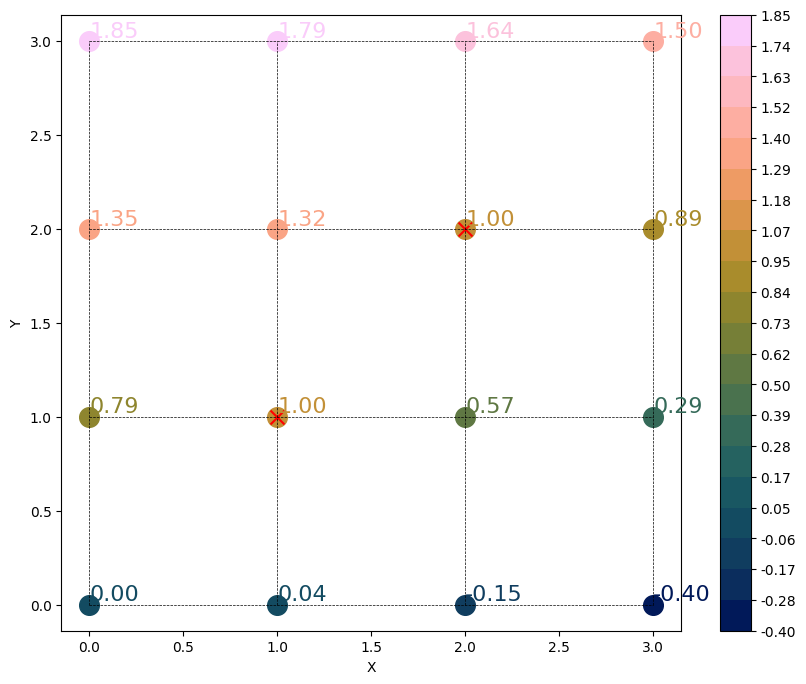

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# 定义 RBF 函数
def rbf(r, epsilon=1.0, function='multiquadric'):
    if function == 'multiquadric':
        return np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'inverse_multiquadric':
        return 1.0 / np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'gaussian':
        return np.exp(-(epsilon * r) ** 2)
    elif function == 'linear':
        return r
    elif function == 'cubic':
        return r ** 3
    elif function == 'quintic':
        return r ** 5
    else:
        raise ValueError(f"Unknown RBF function: {function}")

# 定义距离函数
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# RBF 插值函数
def rbf_interpolation(x, y, z, xi, yi, epsilon=1.0, function='multiquadric'):
    # 计算每个数据点之间的距离矩阵
    n = len(x)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = rbf(distance(x[i], y[i], x[j], y[j]), epsilon, function)
    D_matrix = np.array([[D[x,y][0]],[D[x,y][1]]])
    A = np.concatenate((np.concatenate((A,D_matrix),axis=1),np.concatenate((D_matrix.T,np.zeros((1,1))),axis=1)),axis=0)
    # 求解权重系数
    z = np.concatenate((z,np.zeros(1)))



    # N = z.shape[0]  # λ1 的数量
    # lambda_1 = 1  # λ1 的值
    # lambda_2 = 10  # 转换为浮点数

    # # lambda_2 = np.array([int(self.scaling_factor.get())])  # 确保输入为浮点数 # λ2 的值

    # # 创建对角线矩阵
    # diagonal_values = [lambda_1] * (N - 1) + [lambda_2]  # 前 N-1 个为 λ1，最后一个为 λ2
    # diagonal_matrix = np.diag(diagonal_values)

    # A = np.dot(A, diagonal_matrix) 







    weights = np.linalg.solve(A, z)
    # 计算插值结果
    zi = np.zeros_like(xi, dtype=float)
    for i in range(len(xi)):
        for j in range(n):
            r = distance(xi[i], yi[i], x[j], y[j])
            zi[i] += weights[j] * rbf(r, epsilon, function) 
        idx_x = int(xi[i] / (xx[-1] - xx[0]) * (D.shape[1] - 1))
        idx_y = int(yi[i] / (yy[-1] - yy[0]) * (D.shape[0] - 1))

        # 确保索引在范围内
        idx_x = min(max(idx_x, 0), D.shape[1] - 1)
        idx_y = min(max(idx_y, 0), D.shape[0] - 1)

        # 更新 zi 值
        zi[i] += D[idx_y, idx_x] * weights[-1] 
    print(weights)
    print(zi)
    return zi


D = np.array([
    [0, 0, 0, 0],
    [1, 1, 1, 1],
    [2, 2, 2, 2],
    [3, 3, 3, 3]
])

# D = np.array([
#     [3, 2, 2, 3],
#     [2, 1, 1, 2],
#     [2, 1, 1, 2],
#     [3, 2, 2, 3]
# ])

D_e = np.array([
    [10, 10, 10, 10],
    [10, 10, 10, 10],
    [10, 10, 10, 10],
    [10, 10, 10, 10]
])

D = D 

# D = np.array([
#     [0, 0, 0, 0 ,0],
#     [0, 0, 0, 0 ,0],
#     [0, 0, 0, 0 ,0],
#     [0, 0, 0, 0 ,0],
#     [0, 0, 0, 0 ,0]
# ])

# 生成一些随机数据点
np.random.seed(0)
x = np.array([1,2])
y = np.array([1,2])
z = np.array([1,1])

# 创建网格坐标
xx = np.linspace(0, 3, D.shape[1])
yy = np.linspace(0, 3, D.shape[0])
grid_x, grid_y = np.meshgrid(xx, yy)
# grid_x, grid_y = np.mgrid[0:4:4j, 0:4:4j]
grid_x_flat = grid_x.flatten()
grid_y_flat = grid_y.flatten()

# 使用自定义 RBF 插值
interpolated_z_flat = rbf_interpolation(x, y, z, grid_x_flat, grid_y_flat, epsilon=1.0, function='linear')
interpolated_z = interpolated_z_flat.reshape(grid_x.shape)

# # 绘制结果
# plt.figure(figsize=(10, 6))
# plt.imshow(interpolated_z, extent=(0, 4, 0, 4), origin='lower', cmap='viridis')
# plt.colorbar(label='Interpolated Value')
# plt.scatter(x, y, c='r', label='Data Points')
# # plt.legend()
# plt.title('RBF Interpolation (Custom Implementation)')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()
# 定义离散颜色映射
# levels = np.unique(interpolated_z)  # 提取唯一值作为级别
# cmap = cm.get_cmap('viridis', len(levels))  # 离散化颜色映射为与级别数量相同
# norm = mcolors.BoundaryNorm(boundaries=np.append(levels, levels[-1] + 0.1), ncolors=len(levels))  # 设置边界
# 设置离散颜色映射，将颜色条分为 10 段，范围为 0 到 3
levels = np.linspace(0, 3, 21)  # 将 0 到 3 分为 10 段
levels = np.linspace(np.unique(interpolated_z).min(), np.unique(interpolated_z).max(), 21) 
cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 离散化颜色映射为 10 段
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=len(levels) - 1)  # 设置边界
# 创建图形
plt.figure(figsize=(10, 8))

# 绘制网格线
for x_ in xx:
    plt.plot([x_, x_], [yy[0], yy[-1]], color='black', linestyle='--', linewidth=0.5)
for y_ in yy:
    plt.plot([xx[0], xx[-1]], [y_, y_], color='black', linestyle='--', linewidth=0.5)

# 绘制顶点并根据标量值着色
for i in range(interpolated_z.shape[0]):
    for j in range(interpolated_z.shape[1]):
        value = interpolated_z[i, j]
        color = cmap(norm(value))
        plt.scatter(grid_x[i, j], grid_y[i, j], color=color, s=200,marker='o')  # 使用 cmap 颜色映射
        plt.text(grid_x[i, j], grid_y[i, j], f'{value:.2f}', color=color, fontsize=16, ha='left', va='bottom')

# 添加离散颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, boundaries=np.append(levels, levels[-1] + 0.1), ticks=levels,)
cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.scatter(x, y,c='r', label='Data Points',marker='x',s=100)
# 设置坐标范围和标签
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel('X')
plt.ylabel('Y')
# plt.title('Grid with Vertex Values (Discrete Scalar Bar)')

# 设置坐标轴比例相等
plt.axis('equal')

# 显示图形
plt.show()


C:\Users\jya\AppData\Local\Temp\ipykernel_24036\713314920.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 离散化颜色映射为 10 段
C:\Users\jya\AppData\Local\Temp\ipykernel_24036\713314920.py:47: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, boundaries=np.append(levels, levels[-1] + 0.1), ticks=levels)


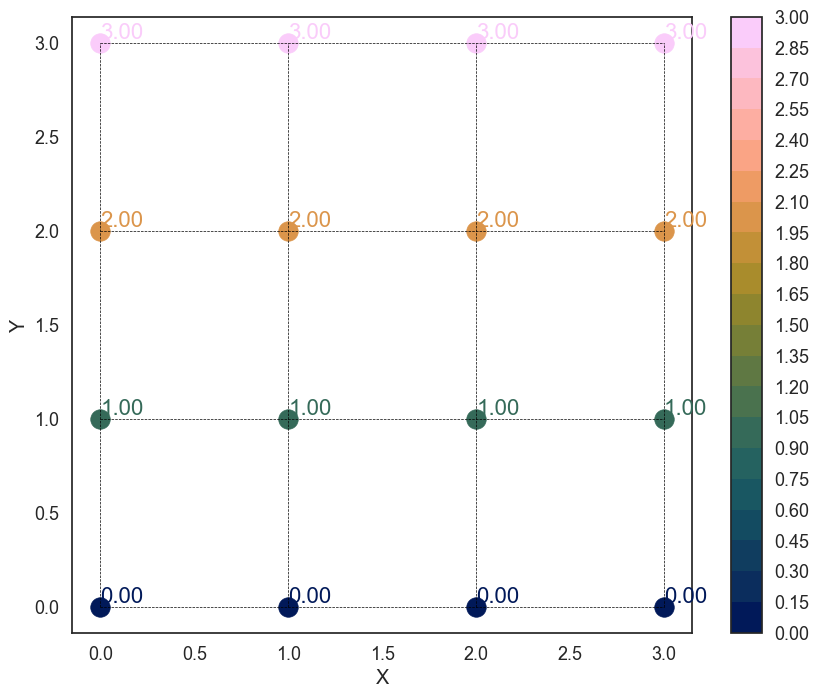

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# 创建矩阵 D，表示网格上的值
D = np.array([
    [0, 0, 0, 0],
    [1, 1, 1, 1],
    [2, 2, 2, 2],
    [3, 3, 3, 3]
])

# 创建网格坐标
xx = np.linspace(0, 3, D.shape[1])
yy = np.linspace(0, 3, D.shape[0])
grid_x, grid_y = np.meshgrid(xx, yy)

# # 定义离散颜色映射
# levels = np.unique(D)  # 提取唯一值作为级别
# cmap = cm.get_cmap('viridis', len(levels))  # 离散化颜色映射为与级别数量相同
# norm = mcolors.BoundaryNorm(boundaries=np.append(levels, levels[-1] + 0.1), ncolors=len(levels))  # 设置边界
# 设置离散颜色映射，将颜色条分为 10 段，范围为 0 到 3
levels = np.linspace(0, 3, 21)  # 将 0 到 3 分为 10 段
cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 离散化颜色映射为 10 段
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=len(levels) - 1)  # 设置边界
# 创建图形
plt.figure(figsize=(10, 8))

# 绘制网格线
for x in xx:
    plt.plot([x, x], [yy[0], yy[-1]], color='black', linestyle='--', linewidth=0.5)
for y in yy:
    plt.plot([xx[0], xx[-1]], [y, y], color='black', linestyle='--', linewidth=0.5)

# 绘制顶点并根据标量值着色
for i in range(D.shape[0]):
    for j in range(D.shape[1]):
        value = D[i, j]
        color = cmap(norm(value))
        plt.scatter(grid_x[i, j], grid_y[i, j], color=color, s=200)  # 使用 cmap 颜色映射
        plt.text(grid_x[i, j], grid_y[i, j], f'{value:.2f}', color=color, fontsize=16, ha='left', va='bottom')

# 添加离散颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, boundaries=np.append(levels, levels[-1] + 0.1), ticks=levels)

# 设置坐标范围和标签
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel('X')
plt.ylabel('Y')
# plt.title('Grid with Vertex Values (Discrete Scalar Bar)')

# 设置坐标轴比例相等
plt.axis('equal')

# 显示图形
plt.show()


[0.70710678 0.        ]


C:\Users\jya\AppData\Local\Temp\ipykernel_24036\517037680.py:84: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 离散化颜色映射为 10 段
C:\Users\jya\AppData\Local\Temp\ipykernel_24036\517037680.py:106: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, boundaries=np.append(levels, levels[-1] + 0.1), ticks=levels,)


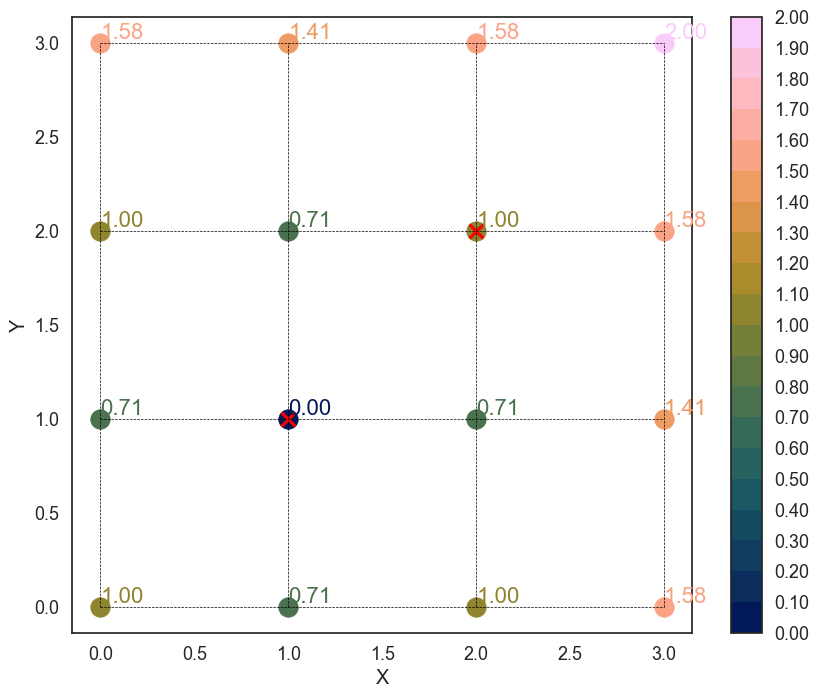

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# 定义 RBF 函数
def rbf(r, epsilon=1.0, function='multiquadric'):
    if function == 'multiquadric':
        return np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'inverse_multiquadric':
        return 1.0 / np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'gaussian':
        return np.exp(-(epsilon * r) ** 2)
    elif function == 'linear':
        return r
    elif function == 'cubic':
        return r ** 3
    elif function == 'quintic':
        return r ** 5
    else:
        raise ValueError(f"Unknown RBF function: {function}")

# 定义距离函数
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# RBF 插值函数
def rbf_interpolation(x, y, z, xi, yi, epsilon=1.0, function='multiquadric'):
    # 计算每个数据点之间的距离矩阵
    n = len(x)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = rbf(distance(x[i], y[i], x[j], y[j]), epsilon, function)

    # 求解权重系数
    weights = np.linalg.solve(A, z)
    print(weights)

    # 计算插值结果
    zi = np.zeros_like(xi, dtype=float)
    for i in range(len(xi)):
        for j in range(n):
            r = distance(xi[i], yi[i], x[j], y[j])
            zi[i] += weights[j] * rbf(r, epsilon, function) 

    return zi


# 生成一些随机数据点
np.random.seed(0)
x = np.array([1,2])
y = np.array([1,2])
z = np.array([0,1])

# 生成网格来绘制插值结果
xx = np.arange(0, 4, 1)
yy = np.arange(0, 4, 1)
grid_x, grid_y = np.meshgrid(xx, yy)
# grid_x, grid_y = np.mgrid[0:4:4j, 0:4:4j]
grid_x_flat = grid_x.flatten()
grid_y_flat = grid_y.flatten()

# 使用自定义 RBF 插值
interpolated_z_flat = rbf_interpolation(x, y, z, grid_x_flat, grid_y_flat, epsilon=1.0, function='linear')
interpolated_z = interpolated_z_flat.reshape(grid_x.shape)
# print(interpolated_z)
# # 绘制结果
# plt.figure(figsize=(10, 6))
# plt.imshow(interpolated_z, extent=(0, 4, 0, 4), origin='lower', cmap='viridis')
# plt.colorbar(label='Interpolated Value')
# plt.scatter(x, y, c='r', label='Data Points')
# # plt.legend()
# plt.title('RBF Interpolation (Custom Implementation)')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()
# 定义离散颜色映射
# levels = np.unique(interpolated_z)  # 提取唯一值作为级别
# cmap = cm.get_cmap('viridis', len(levels))  # 离散化颜色映射为与级别数量相同
# norm = mcolors.BoundaryNorm(boundaries=np.append(levels, levels[-1] + 0.1), ncolors=len(levels))  # 设置边界
# 设置离散颜色映射，将颜色条分为 10 段，范围为 0 到 3
levels = np.linspace(0, 2, 21)  # 将 0 到 3 分为 10 段
cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 离散化颜色映射为 10 段
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=len(levels) - 1)  # 设置边界
# 创建图形
plt.figure(figsize=(10, 8))

# 绘制网格线
for x_ in xx:
    plt.plot([x_, x_], [yy[0], yy[-1]], color='black', linestyle='--', linewidth=0.5)
for y_ in yy:
    plt.plot([xx[0], xx[-1]], [y_, y_], color='black', linestyle='--', linewidth=0.5)

# 绘制顶点并根据标量值着色
for i in range(interpolated_z.shape[0]):
    for j in range(interpolated_z.shape[1]):
        value = interpolated_z[i, j]
        color = cmap(norm(value))
        plt.scatter(grid_x[i, j], grid_y[i, j], color=color, s=200)  # 使用 cmap 颜色映射
        plt.text(grid_x[i, j], grid_y[i, j], f'{value:.2f}', color=color, fontsize=16, ha='left', va='bottom')

# 添加离散颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, boundaries=np.append(levels, levels[-1] + 0.1), ticks=levels,)
cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.scatter(x, y,c='r', label='Data Points',marker='x',s=100)
# 设置坐标范围和标签
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel('X')
plt.ylabel('Y')
# plt.title('Grid with Vertex Values (Discrete Scalar Bar)')

# 设置坐标轴比例相等
plt.axis('equal')

# 显示图形
plt.show()


[0.70710678 0.        ]


C:\Users\jya\AppData\Local\Temp\ipykernel_24036\3548893893.py:84: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 离散化颜色映射为 10 段
C:\Users\jya\AppData\Local\Temp\ipykernel_24036\3548893893.py:105: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, boundaries=np.append(levels, levels[-1] + 0.1), ticks=levels)


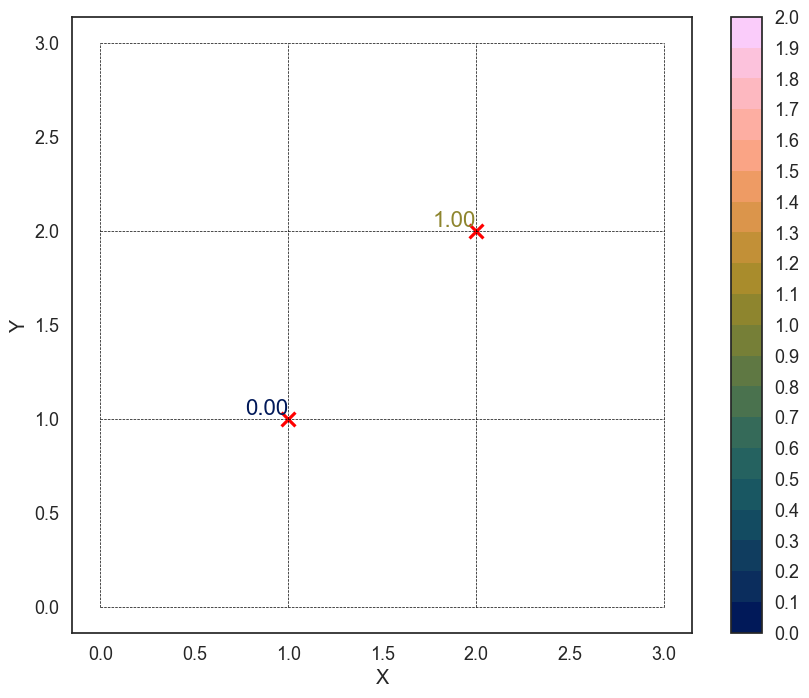

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# 定义 RBF 函数
def rbf(r, epsilon=1.0, function='multiquadric'):
    if function == 'multiquadric':
        return np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'inverse_multiquadric':
        return 1.0 / np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'gaussian':
        return np.exp(-(epsilon * r) ** 2)
    elif function == 'linear':
        return r
    elif function == 'cubic':
        return r ** 3
    elif function == 'quintic':
        return r ** 5
    else:
        raise ValueError(f"Unknown RBF function: {function}")

# 定义距离函数
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# RBF 插值函数
def rbf_interpolation(x, y, z, xi, yi, epsilon=1.0, function='multiquadric'):
    # 计算每个数据点之间的距离矩阵
    n = len(x)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = rbf(distance(x[i], y[i], x[j], y[j]), epsilon, function)

    # 求解权重系数
    weights = np.linalg.solve(A, z)
    print(weights)

    # 计算插值结果
    zi = np.zeros_like(xi, dtype=float)
    for i in range(len(xi)):
        for j in range(n):
            r = distance(xi[i], yi[i], x[j], y[j])
            zi[i] += weights[j] * rbf(r, epsilon, function) 

    return zi


# 生成一些随机数据点
np.random.seed(0)
x = np.array([1,2])
y = np.array([1,2])
z = np.array([0,1])

# 生成网格来绘制插值结果
xx = np.arange(0, 4, 1)
yy = np.arange(0, 4, 1)
grid_x, grid_y = np.meshgrid(xx, yy)
# grid_x, grid_y = np.mgrid[0:4:4j, 0:4:4j]
grid_x_flat = grid_x.flatten()
grid_y_flat = grid_y.flatten()

# 使用自定义 RBF 插值
interpolated_z_flat = rbf_interpolation(x, y, z, grid_x_flat, grid_y_flat, epsilon=1.0, function='linear')
interpolated_z = interpolated_z_flat.reshape(grid_x.shape)
# print(interpolated_z)
# # 绘制结果
# plt.figure(figsize=(10, 6))
# plt.imshow(interpolated_z, extent=(0, 4, 0, 4), origin='lower', cmap='viridis')
# plt.colorbar(label='Interpolated Value')
# plt.scatter(x, y, c='r', label='Data Points')
# # plt.legend()
# plt.title('RBF Interpolation (Custom Implementation)')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()
# 定义离散颜色映射
# levels = np.unique(z)  # 提取唯一值作为级别
# cmap = cm.get_cmap('viridis', len(levels))  # 离散化颜色映射为与级别数量相同
# norm = mcolors.BoundaryNorm(boundaries=np.append(levels, levels[-1] + 0.1), ncolors=len(levels))  # 设置边界
# 设置离散颜色映射，将颜色条分为 10 段，范围为 0 到 3
levels = np.linspace(0, 2, 21)  # 将 0 到 3 分为 10 段
cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 离散化颜色映射为 10 段
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=len(levels) - 1)  # 设置边界
# 创建图形
plt.figure(figsize=(10, 8))

# 绘制网格线
for x_ in xx:
    plt.plot([x_, x_], [yy[0], yy[-1]], color='black', linestyle='--', linewidth=0.5)
for y_ in yy:
    plt.plot([xx[0], xx[-1]], [y_, y_], color='black', linestyle='--', linewidth=0.5)

# 绘制顶点并根据标量值着色
for i in range(x.shape[0]):
    value = z[i]
    color = cmap(norm(value))
    # plt.scatter(x[i], y[i], color=color, s=200)  # 使用 cmap 颜色映射
    plt.text(x[i], y[i], f'{value:.2f}', color=color, fontsize=16, ha='right', va='bottom')

# 添加离散颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, boundaries=np.append(levels, levels[-1] + 0.1), ticks=levels)
plt.scatter(x, y,c='r', label='Data Points',marker='x',s=100)
# 设置坐标范围和标签
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel('X')
plt.ylabel('Y')
# plt.title('Grid with Vertex Values (Discrete Scalar Bar)')

# 设置坐标轴比例相等
plt.axis('equal')

# 显示图形
plt.show()


Text(0.5, 1.0, 'Inverse multiquadric')

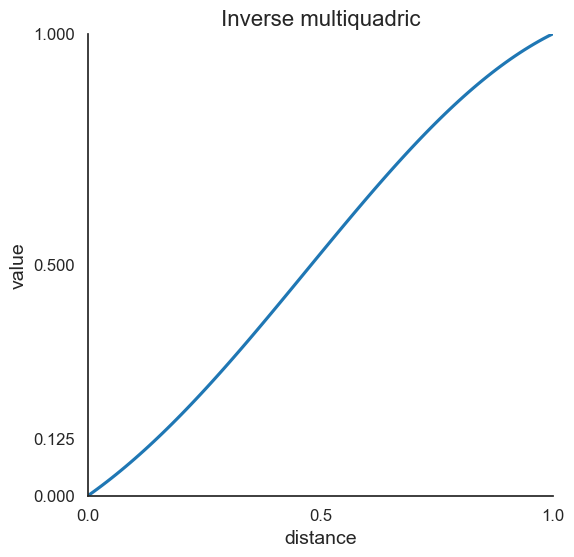

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def rbf(r, epsilon=1.0, function='multiquadric'):
    if function == 'multiquadric':
        return np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'inverse_multiquadric':
        return 1.0 / np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'gaussian':
        return np.exp(-(epsilon * r) ** 2)
    elif function == 'linear':
        return r
    elif function == 'cubic':
        return r ** 3
    elif function == 'quintic':
        return r ** 5
    else:
        raise ValueError(f"Unknown RBF function: {function}")
def f(x):
    return rbf(x, epsilon=1.0, function='inverse_multiquadric')
A = np.array([[f(0), f(1)], [f(1), f(0)]])
b = np.array([0, 1])
w = np.linalg.solve(A, b)

x = np.linspace(0, 1, 100)
y = f(x)*w[0] + f(1-x)*w[1]
# y = np.exp(-(1 * x) ** 2) / np.exp(-(1 * 1) ** 2)


plt.figure(figsize=(6, 6))  # 设置图形为正方形，例如 5x5 英寸
plt.plot(x, y, '-')
# 添加 x=0.5 和 y=0.5 的虚线（限制在线条范围内）
# plt.plot([0.5, 0.5], [0, 0.125], color='gray', linestyle='--', linewidth=3)  # x=0.5 的虚线
# plt.plot([0, 0.5], [0.125, 0.125], color='gray', linestyle='--', linewidth=3)  # y=0.5 的虚线
# 设置 x 和 y 轴的范围确保从原点开始
plt.xlim(0, 1)
plt.ylim(0, 1)
# 设置 x 和 y 轴的刻度，使得 0.5 的值在刻度上标出
plt.xticks([0, 0.5, 1], fontsize=12)
plt.yticks([0, 0.125,0.5, 1], fontsize=12)
# 移除顶部和右侧的边框
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('distance', fontsize=14)
plt.ylabel('value', fontsize=14)
plt.title('Inverse multiquadric', fontsize=16)


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import Normalize

def rbf(r, epsilon=1.0, function='multiquadric'):
    if function == 'multiquadric':
        return np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'inverse_multiquadric':
        return 1.0 / np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'gaussian':
        return np.exp(-(epsilon * r) ** 2)
    elif function == 'linear':
        return r
    elif function == 'cubic':
        return r ** 3
    elif function == 'quintic':
        return r ** 5
    else:
        raise ValueError(f"Unknown RBF function: {function}")

def f(x):
    return rbf(x, epsilon=2, function='quintic')

A = np.array([[f(0), f(1)], [f(1), f(0)]])
b = np.array([0, 1])
w = np.linalg.solve(A, b)

x = np.linspace(0, 1, 100)
y = f(x) * w[0] + f(1 - x) * w[1]

# 创建线段数据
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# 创建颜色映射
norm = Normalize(vmin=0, vmax=1)
colors = plt.cm.viridis(norm(x))  # 使用 viridis 颜色映射

# 使用 LineCollection 来创建带有颜色渐变的线条
lc = LineCollection(segments, cmap='cmc.batlow', norm=norm, array=y, linewidth=2)

fig, ax = plt.subplots(figsize=(8, 6))
line = ax.add_collection(lc)
# plt.plot([0.5, 0.5], [0, 0.125], color='gray', linestyle='--', linewidth=3)  # x=0.5 的虚线
# plt.plot([0, 0.5], [0.125, 0.125], color='gray', linestyle='--', linewidth=3)  # y=0.5 的虚线
# plt.plot([0.5, 0.5], [0, 0.5], color='gray', linestyle='--', linewidth=3)  # x=0.5 的虚线
# plt.plot([0, 0.5], [0.5, 0.5], color='gray', linestyle='--', linewidth=3)  # y=0.5 的虚线
# 设置 x 和 y 轴的范围确保从原点开始
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# 设置 x 和 y 轴的刻度，使得 0.5 的值在刻度上标出
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])

# 移除顶部和右侧的边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 设置标签和标题
plt.xlabel('distance', fontsize=14)
plt.ylabel('value', fontsize=14)
plt.title('Quintic', fontsize=16)
# plt.axis('equal')
# 添加颜色条
cbar = fig.colorbar(line, ax=ax)
# cbar.set_label('Scalar Value', fontsize=14)

plt.show()


ValueError: 'cmc.batlow' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.ndimage import zoom

D = np.array([
    [0, 0, 0, 0],
    [1, 1, 1, 1],
    [2, 2, 2, 2],
    [3, 3, 3, 3]
])

# 使用 zoom 函数进行插值
zoom_factor = 16 / 4  # 缩放因子
D = zoom(D, zoom_factor, order=3)  # order=3 表示三次样条插值

# 创建网格坐标
xx = np.arange(0, 3.2, 0.2)
yy = np.arange(0, 3.2, 0.2)
grid_x, grid_y = np.meshgrid(xx, yy)

# 定义明确的离散颜色级别
levels = [0, 1, 2, 3, 4]  # 确保包含原始数据和边界外的值
cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 离散化颜色映射
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=len(levels) - 1)  # 设置边界

# 创建图形
plt.figure(figsize=(10, 8))

# 绘制网格线
for x in xx:
    plt.plot([x, x], [yy[0], yy[-1]], color='black', linestyle='--', linewidth=0.5)
for y in yy:
    plt.plot([xx[0], xx[-1]], [y, y], color='black', linestyle='--', linewidth=0.5)

# 绘制顶点并根据标量值着色
for i in range(D.shape[0]):
    for j in range(D.shape[1]):
        value = D[i, j]
        color = cmap(norm(value))
        plt.scatter(grid_x[i, j], grid_y[i, j], color=color, s=600, marker='s')  # 使用 cmap 颜色映射
# 标注原始数据点
x = np.array([1, 2])
y = np.array([1, 2])
plt.scatter(x, y, c='r', label='Data Points', marker='x', s=100)
# 添加离散颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar =plt.colorbar(sm, boundaries=levels, ticks=levels)
cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
# 设置坐标范围和标签
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel('X')
plt.ylabel('Y')

# 设置坐标轴比例相等
plt.axis('equal')

# 显示图形
plt.show()


C:\Users\jya\AppData\Local\Temp\ipykernel_24036\766344466.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 离散化颜色映射


ValueError: 'cmc.batlow' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

C:\Users\jya\AppData\Local\Temp\ipykernel_36552\1393821560.py:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 使用 cmcrameri 中的 batlow 颜色映射
C:\Users\jya\AppData\Local\Temp\ipykernel_36552\1393821560.py:101: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, boundaries=levels, ticks=levels)


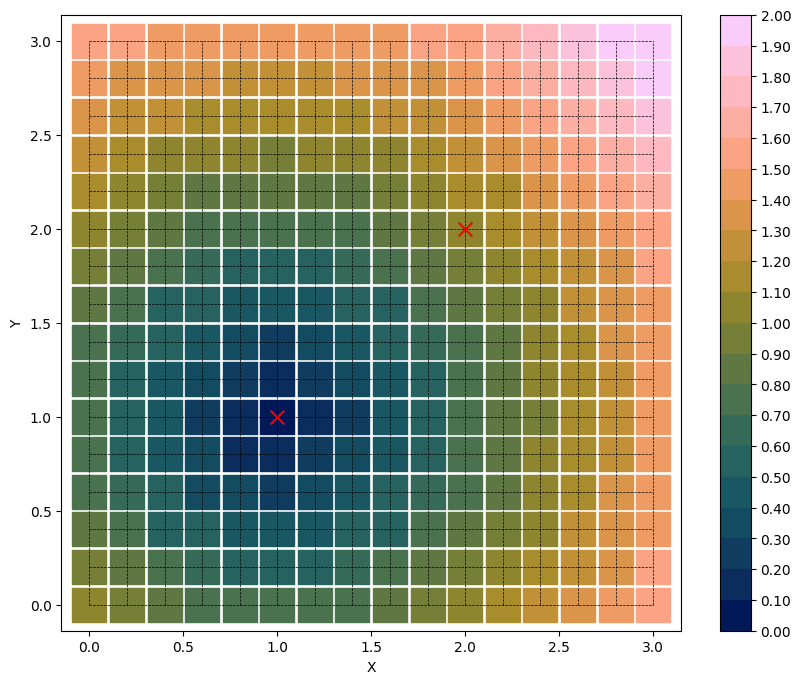

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.ndimage import zoom
import cmcrameri as cmc
import matplotlib.ticker as ticker

# 定义 RBF 函数
def rbf(r, epsilon=1.0, function='multiquadric'):
    if function == 'multiquadric':
        return np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'inverse_multiquadric':
        return 1.0 / np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'gaussian':
        return np.exp(-(epsilon * r) ** 2)
    elif function == 'linear':
        return r
    elif function == 'cubic':
        return r ** 3
    elif function == 'quintic':
        return r ** 5
    else:
        raise ValueError(f"Unknown RBF function: {function}")

# 定义距离函数
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# RBF 插值函数
def rbf_interpolation(x, y, z, xi, yi, epsilon=1.0, function='multiquadric'):
    # 计算每个数据点之间的距离矩阵
    n = len(x)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = rbf(distance(x[i], y[i], x[j], y[j]), epsilon, function)
    
    # 求解权重系数
    weights = np.linalg.solve(A, z)

    zi = np.zeros_like(xi, dtype=float)
    for i in range(len(xi)):
        for j in range(n):
            r = distance(xi[i], yi[i], x[j], y[j])
            zi[i] += weights[j] * rbf(r, epsilon, function)

    return zi

D = np.array([
    [0, 0, 0, 0],
    [1, 1, 1, 1],
    [2, 2, 2, 2],
    [3, 3, 3, 3]
])
zoom_factor = 16 / 4  # 缩放因子
D_zoom = zoom(D, zoom_factor, order=3)  # order=3 表示三次样条插值

# 生成一些随机数据点
np.random.seed(0)
x = np.array([1, 2])
y = np.array([1, 2])
z = np.array([0, 1])

# 生成网格来绘制插值结果
xx = np.arange(0, 3.2, 0.2)
yy = np.arange(0, 3.2, 0.2)
grid_x, grid_y = np.meshgrid(xx, yy)
grid_x_flat = grid_x.flatten()
grid_y_flat = grid_y.flatten()

# 使用自定义 RBF 插值
interpolated_z_flat = rbf_interpolation(x, y, z, grid_x_flat, grid_y_flat, epsilon=1.0, function='linear')
interpolated_z = interpolated_z_flat.reshape(grid_x.shape)

# 定义明确的离散颜色级别
# levels = [0, 1, 2, 3, 4]  # 确保包含所有可能的级别
levels = np.linspace(np.unique(interpolated_z).min(), np.unique(interpolated_z).max(), 21)  # 将 0 到 3 分为 10 段
cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 使用 cmcrameri 中的 batlow 颜色映射
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=len(levels) - 1)  # 设置边界

# 创建图形
plt.figure(figsize=(10, 8))

# 绘制网格线
for x_ in xx:
    plt.plot([x_, x_], [yy[0], yy[-1]], color='black', linestyle='--', linewidth=0.5)
for y_ in yy:
    plt.plot([xx[0], xx[-1]], [y_, y_], color='black', linestyle='--', linewidth=0.5)

# 绘制顶点并根据标量值着色
for i in range(interpolated_z.shape[0]):
    for j in range(interpolated_z.shape[1]):
        value = interpolated_z[i, j]
        color = cmap(norm(value))
        plt.scatter(grid_x[i, j], grid_y[i, j], color=color, s=600, marker='s')  # 使用 cmap 颜色映射

# 添加离散颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, boundaries=levels, ticks=levels)
cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
# 标注原始数据点
plt.scatter(x, y, c='r', label='Data Points', marker='x', s=100)

# 设置坐标范围和标签
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel('X')
plt.ylabel('Y')

# 设置坐标轴比例相等
plt.axis('equal')

# 显示图形
plt.show()


[[5 5 5 5]
 [6 6 6 6]
 [7 7 7 7]
 [8 8 8 8]]
[[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]]
[ 0.35355339 -0.30304576  0.07142857]


C:\Users\jya\AppData\Local\Temp\ipykernel_36552\3592519736.py:103: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 使用 cmcrameri 中的 batlow 颜色映射


5.551115123125783e-17
1.0


C:\Users\jya\AppData\Local\Temp\ipykernel_36552\3592519736.py:125: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, boundaries=levels, ticks=levels)


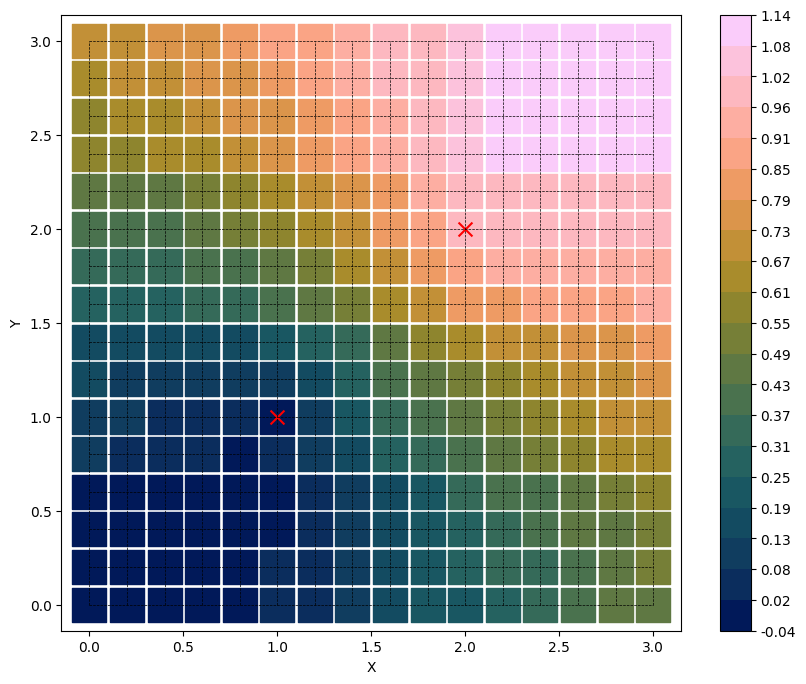

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.ndimage import zoom
import cmcrameri as cmc

# 定义 RBF 函数
def rbf(r, epsilon=1.0, function='multiquadric'):
    if function == 'multiquadric':
        return np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'inverse_multiquadric':
        return 1.0 / np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'gaussian':
        return np.exp(-(epsilon * r) ** 2)
    elif function == 'linear':
        return r
    elif function == 'cubic':
        return r ** 3
    elif function == 'quintic':
        return r ** 5
    else:
        raise ValueError(f"Unknown RBF function: {function}")

# 定义距离函数
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# RBF 插值函数
def rbf_interpolation(x, y, z, xi, yi, epsilon=1.0, function='multiquadric'):
    # 计算每个数据点之间的距离矩阵
    n = len(x)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = rbf(distance(x[i], y[i], x[j], y[j]), epsilon, function)
    D_matrix = np.array([[D[x,y][0]],[D[x,y][1]]])
    A = np.concatenate((np.concatenate((A,D_matrix),axis=1),np.concatenate((D_matrix.T,np.zeros((1,1))),axis=1)),axis=0)
    # 求解权重系数
    z = np.concatenate((z,np.zeros(1)))
    weights = np.linalg.solve(A, z)
    print(weights)
    zi = np.zeros_like(xi, dtype=float)
    for i in range(len(xi)):
        for j in range(n):
            r = distance(xi[i], yi[i], x[j], y[j])
            zi[i] += weights[j] * rbf(r, epsilon, function)

        # 获取 D_zoom 中的值
        # 将网格的坐标转换到 D_zoom 的索引范围内
        idx_x = int(xi[i] / (xx[-1] - xx[0]) * (D_zoom.shape[1] - 1))
        idx_y = int(yi[i] / (yy[-1] - yy[0]) * (D_zoom.shape[0] - 1))

        # 确保索引在范围内
        idx_x = min(max(idx_x, 0), D_zoom.shape[1] - 1)
        idx_y = min(max(idx_y, 0), D_zoom.shape[0] - 1)

        # 更新 zi 值
        zi[i] += D_zoom[idx_y, idx_x] * weights[-1]

    return zi

# 原始数据
D = np.array([
    [0, 0, 0, 0],
    [1, 1, 1, 1],
    [2, 2, 2, 2],
    [3, 3, 3, 3]
])



D = D  +5
print(D)

# 使用 zoom 函数进行插值
zoom_factor = 16 / 4  # 缩放因子
D_zoom = zoom(D, zoom_factor, order=3)  # order=3 表示三次样条插值
print(D_zoom)


# 生成一些随机数据点
np.random.seed(0)
x = np.array([1, 2])
y = np.array([1, 2])
z = np.array([0, 1])

# 生成网格来绘制插值结果
xx = np.arange(0, 3.2, 0.2)
yy = np.arange(0, 3.2, 0.2)
grid_x, grid_y = np.meshgrid(xx, yy)
grid_x_flat = grid_x.flatten()
grid_y_flat = grid_y.flatten()

# 使用自定义 RBF 插值
interpolated_z_flat = rbf_interpolation(x, y, z, grid_x_flat, grid_y_flat, epsilon=1.0, function='linear')
interpolated_z = interpolated_z_flat.reshape(grid_x.shape)

# 定义明确的离散颜色级别
# levels = [0, 1, 2, 3, 4]  # 确保包含所有可能的级别
levels = np.linspace(np.unique(interpolated_z).min(), np.unique(interpolated_z).max(), 21) 
# levels = np.linspace(0, 2, 21) # 将 0 到 3 分为 10 段
cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 使用 cmcrameri 中的 batlow 颜色映射
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=len(levels) - 1)  # 设置边界

# 创建图形
plt.figure(figsize=(10, 8))

# 绘制网格线
for x_ in xx:
    plt.plot([x_, x_], [yy[0], yy[-1]], color='black', linestyle='--', linewidth=0.5)
for y_ in yy:
    plt.plot([xx[0], xx[-1]], [y_, y_], color='black', linestyle='--', linewidth=0.5)

# 绘制顶点并根据标量值着色
for i in range(interpolated_z.shape[0]):
    for j in range(interpolated_z.shape[1]):
        value = interpolated_z[i, j]
        color = cmap(norm(value))
        plt.scatter(grid_x[i, j], grid_y[i, j], color=color, s=600, marker='s')  # 使用 cmap 颜色映射

# 添加离散颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, boundaries=levels, ticks=levels)
cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
# 标注原始数据点
plt.scatter(x, y, c='r', label='Data Points', marker='x', s=100)

# 设置坐标范围和标签
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel('X')
plt.ylabel('Y')

# 设置坐标轴比例相等
plt.axis('equal')
print(interpolated_z[5,5])
print(interpolated_z[10,10])
# 显示图形
plt.show()


[ 0.35355339 -0.1767767   0.025     ]


C:\Users\jya\AppData\Local\Temp\ipykernel_36552\2310902501.py:109: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 使用 cmcrameri 中的 batlow 颜色映射
C:\Users\jya\AppData\Local\Temp\ipykernel_36552\2310902501.py:131: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, boundaries=levels, ticks=levels)


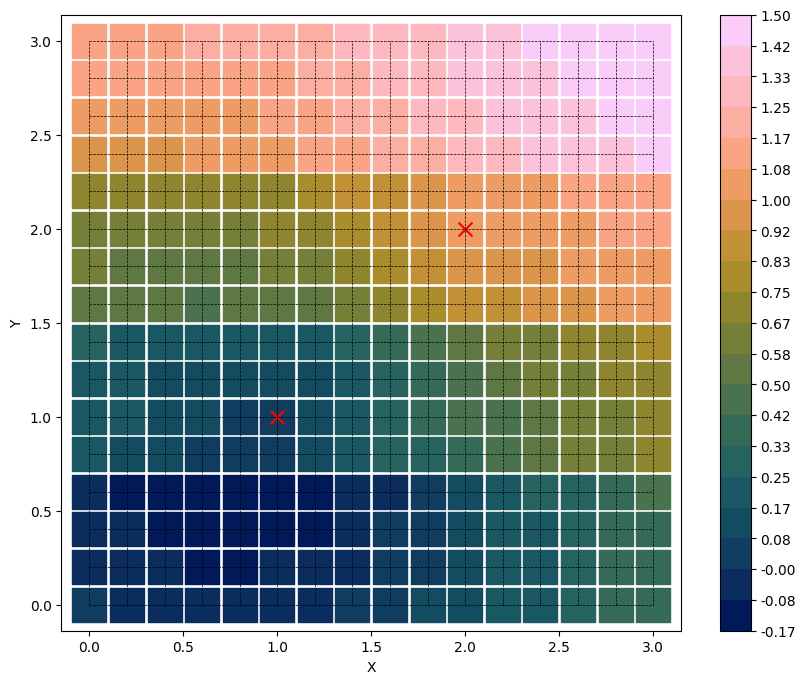

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.ndimage import zoom
import cmcrameri as cmc

# 定义 RBF 函数
def rbf(r, epsilon=1.0, function='multiquadric'):
    if function == 'multiquadric':
        return np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'inverse_multiquadric':
        return 1.0 / np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'gaussian':
        return np.exp(-(epsilon * r) ** 2)
    elif function == 'linear':
        return r
    elif function == 'cubic':
        return r ** 3
    elif function == 'quintic':
        return r ** 5
    else:
        raise ValueError(f"Unknown RBF function: {function}")

# 定义距离函数
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# RBF 插值函数
def rbf_interpolation(x, y, z, xi, yi, epsilon=1.0, function='multiquadric'):
    # 计算每个数据点之间的距离矩阵
    n = len(x)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = rbf(distance(x[i], y[i], x[j], y[j]), epsilon, function)
    D_matrix = np.array([[D[x,y][0]],[D[x,y][1]]])
    A = np.concatenate((np.concatenate((A,D_matrix),axis=1),np.concatenate((D_matrix.T,np.zeros((1,1))),axis=1)),axis=0)
    # 求解权重系数
    z = np.concatenate((z,np.zeros(1)))

    N = z.shape[0]  # λ1 的数量
    lambda_1 = 1  # λ1 的值
    lambda_2 = 10  # 转换为浮点数

    # lambda_2 = np.array([int(self.scaling_factor.get())])  # 确保输入为浮点数 # λ2 的值

    # 创建对角线矩阵
    diagonal_values = [lambda_1] * (N - 1) + [lambda_2]  # 前 N-1 个为 λ1，最后一个为 λ2
    diagonal_matrix = np.diag(diagonal_values)

    A = np.dot(A, diagonal_matrix) 

    weights = np.linalg.solve(A, z)
    print(weights)
    zi = np.zeros_like(xi, dtype=float)
    for i in range(len(xi)):
        for j in range(n):
            r = distance(xi[i], yi[i], x[j], y[j])
            zi[i] += weights[j] * rbf(r, epsilon, function) * lambda_1

        # 获取 D_zoom 中的值
        # 将网格的坐标转换到 D_zoom 的索引范围内
        idx_x = int(xi[i] / (xx[-1] - xx[0]) * (D_zoom.shape[1] - 1))
        idx_y = int(yi[i] / (yy[-1] - yy[0]) * (D_zoom.shape[0] - 1))

        # 确保索引在范围内
        idx_x = min(max(idx_x, 0), D_zoom.shape[1] - 1)
        idx_y = min(max(idx_y, 0), D_zoom.shape[0] - 1)

        # 更新 zi 值
        zi[i] += D_zoom[idx_y, idx_x] * weights[-1] * lambda_2

    return zi

# 原始数据
D = np.array([
    [0, 0, 0, 0],
    [1, 1, 1, 1],
    [2, 2, 2, 2],
    [3, 3, 3, 3]
])

# 使用 zoom 函数进行插值
zoom_factor = 16 / 4  # 缩放因子
D_zoom = zoom(D, zoom_factor, order=3)  # order=3 表示三次样条插值

# 生成一些随机数据点
np.random.seed(0)
x = np.array([1, 2])
y = np.array([1, 2])
z = np.array([0, 1])

# 生成网格来绘制插值结果
xx = np.arange(0, 3.2, 0.2)
yy = np.arange(0, 3.2, 0.2)
grid_x, grid_y = np.meshgrid(xx, yy)
grid_x_flat = grid_x.flatten()
grid_y_flat = grid_y.flatten()

# 使用自定义 RBF 插值
interpolated_z_flat = rbf_interpolation(x, y, z, grid_x_flat, grid_y_flat, epsilon=1.0, function='linear')
interpolated_z = interpolated_z_flat.reshape(grid_x.shape)

# 定义明确的离散颜色级别
# levels = [0, 1, 2, 3, 4]  # 确保包含所有可能的级别
levels = np.linspace(np.unique(interpolated_z).min(), np.unique(interpolated_z).max(), 21) 
# levels = np.linspace(0, 2, 21) # 将 0 到 3 分为 10 段
cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 使用 cmcrameri 中的 batlow 颜色映射
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=len(levels) - 1)  # 设置边界

# 创建图形
plt.figure(figsize=(10, 8))

# 绘制网格线
for x_ in xx:
    plt.plot([x_, x_], [yy[0], yy[-1]], color='black', linestyle='--', linewidth=0.5)
for y_ in yy:
    plt.plot([xx[0], xx[-1]], [y_, y_], color='black', linestyle='--', linewidth=0.5)

# 绘制顶点并根据标量值着色
for i in range(interpolated_z.shape[0]):
    for j in range(interpolated_z.shape[1]):
        value = interpolated_z[i, j]
        color = cmap(norm(value))
        plt.scatter(grid_x[i, j], grid_y[i, j], color=color, s=600, marker='s')  # 使用 cmap 颜色映射

# 添加离散颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, boundaries=levels, ticks=levels)
cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
# 标注原始数据点
plt.scatter(x, y, c='r', label='Data Points', marker='x', s=100)

# 设置坐标范围和标签
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel('X')
plt.ylabel('Y')

# 设置坐标轴比例相等
plt.axis('equal')

# 显示图形
plt.show()


C:\Users\jya\AppData\Local\Temp\ipykernel_36552\4054622247.py:118: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 使用 cmcrameri 中的 batlow 颜色映射


-7.071067811865474e-09
1.0


C:\Users\jya\AppData\Local\Temp\ipykernel_36552\4054622247.py:140: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, boundaries=levels, ticks=levels)


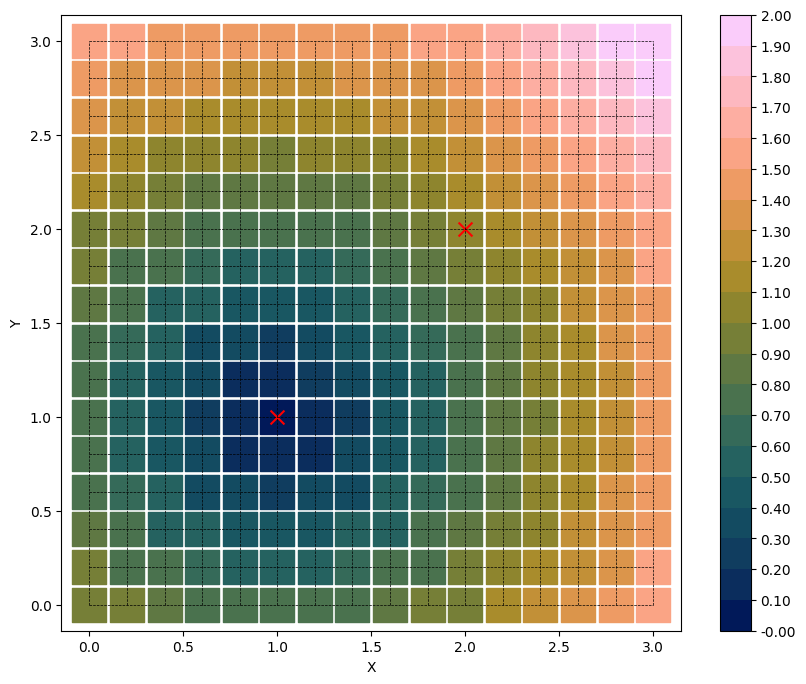

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.ndimage import zoom
import cmcrameri as cmc

# 定义 RBF 函数
def rbf(r, epsilon=1.0, function='multiquadric'):
    if function == 'multiquadric':
        return np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'inverse_multiquadric':
        return 1.0 / np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'gaussian':
        return np.exp(-(epsilon * r) ** 2)
    elif function == 'linear':
        return r
    elif function == 'cubic':
        return r ** 3
    elif function == 'quintic':
        return r ** 5
    else:
        raise ValueError(f"Unknown RBF function: {function}")

# 定义距离函数
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def rbf_interpolation(x, y, z, xi, yi, D_zoom, epsilon=1.0, function='multiquadric', lambda_2=0.01):
    n = len(x)
    # 构造距离矩阵 A
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = rbf(distance(x[i], y[i], x[j], y[j]), epsilon, function)

    # 构造 drift 矩阵 D_matrix
    D_matrix = np.zeros((n, 1))
    for i in range(n):
        idx_x = int(x[i] / (D_zoom.shape[1] - 1) * (D_zoom.shape[1] - 1))
        idx_y = int(y[i] / (D_zoom.shape[0] - 1) * (D_zoom.shape[0] - 1))

        idx_x = min(max(idx_x, 0), D_zoom.shape[1] - 1)
        idx_y = min(max(idx_y, 0), D_zoom.shape[0] - 1)

        D_matrix[i, 0] = D_zoom[idx_y, idx_x]

    # 构造扩展矩阵 A
    A = np.block([
        [A, D_matrix],
        [D_matrix.T, np.zeros((1, 1))]
    ])

    # 添加正则化项
    regularization = np.eye(A.shape[0]) * 1e-8
    A += regularization

    # 设置右侧的值
    b = np.concatenate((z, [lambda_2]))

    # 求解权重
    weights = np.linalg.solve(A, b)

    # 插值计算
    zi = np.zeros_like(xi, dtype=float)
    for i in range(len(xi)):
        for j in range(n):
            r = distance(xi[i], yi[i], x[j], y[j])
            zi[i] += weights[j] * rbf(r, epsilon, function)

        # 添加 drift 的贡献
        idx_x = int(xi[i] / (D_zoom.shape[1] - 1) * (D_zoom.shape[1] - 1))
        idx_y = int(yi[i] / (D_zoom.shape[0] - 1) * (D_zoom.shape[0] - 1))

        idx_x = min(max(idx_x, 0), D_zoom.shape[1] - 1)
        idx_y = min(max(idx_y, 0), D_zoom.shape[0] - 1)

        zi[i] += D_zoom[idx_y, idx_x] * weights[-1]

    return zi




# 原始数据
D = np.array([
    [0, 0, 0, 0],
    [1, 1, 1, 1],
    [2, 2, 2, 2],
    [3, 3, 3, 3]
])

# 使用 zoom 函数进行插值
zoom_factor = 16 / 4  # 缩放因子
D_zoom = zoom(D, zoom_factor, order=3)  # order=3 表示三次样条插值

# 生成一些随机数据点
np.random.seed(0)
x = np.array([1, 2])
y = np.array([1, 2])
z = np.array([0, 1])

# 生成网格来绘制插值结果
xx = np.arange(0, 3.2, 0.2)
yy = np.arange(0, 3.2, 0.2)
grid_x, grid_y = np.meshgrid(xx, yy)
grid_x_flat = grid_x.flatten()
grid_y_flat = grid_y.flatten()

# 使用自定义 RBF 插值
interpolated_z_flat = rbf_interpolation(x, y, z, grid_x_flat, grid_y_flat, epsilon=1.0, function='linear', D_zoom=D_zoom)
interpolated_z = interpolated_z_flat.reshape(grid_x.shape)

# 定义明确的离散颜色级别
# levels = [0, 1, 2, 3, 4]  # 确保包含所有可能的级别
levels = np.linspace(np.unique(interpolated_z).min(), np.unique(interpolated_z).max(), 21) 
# levels = np.linspace(0, 2, 21) # 将 0 到 3 分为 10 段
cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 使用 cmcrameri 中的 batlow 颜色映射
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=len(levels) - 1)  # 设置边界

# 创建图形
plt.figure(figsize=(10, 8))

# 绘制网格线
for x_ in xx:
    plt.plot([x_, x_], [yy[0], yy[-1]], color='black', linestyle='--', linewidth=0.5)
for y_ in yy:
    plt.plot([xx[0], xx[-1]], [y_, y_], color='black', linestyle='--', linewidth=0.5)

# 绘制顶点并根据标量值着色
for i in range(interpolated_z.shape[0]):
    for j in range(interpolated_z.shape[1]):
        value = interpolated_z[i, j]
        color = cmap(norm(value))
        plt.scatter(grid_x[i, j], grid_y[i, j], color=color, s=600, marker='s')  # 使用 cmap 颜色映射

# 添加离散颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, boundaries=levels, ticks=levels)
cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
# 标注原始数据点
plt.scatter(x, y, c='r', label='Data Points', marker='x', s=100)

# 设置坐标范围和标签
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel('X')
plt.ylabel('Y')

# 设置坐标轴比例相等
plt.axis('equal')
print(interpolated_z[5,5])
print(interpolated_z[10,10])
# 显示图形
plt.show()


[ 1.43292059 -0.98129297 -0.04516276]


C:\Users\jya\AppData\Local\Temp\ipykernel_36552\566883620.py:100: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 使用 cmcrameri 中的 batlow 颜色映射
C:\Users\jya\AppData\Local\Temp\ipykernel_36552\566883620.py:122: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, boundaries=levels, ticks=levels)


-1.432920590882538
1.9812929714905565


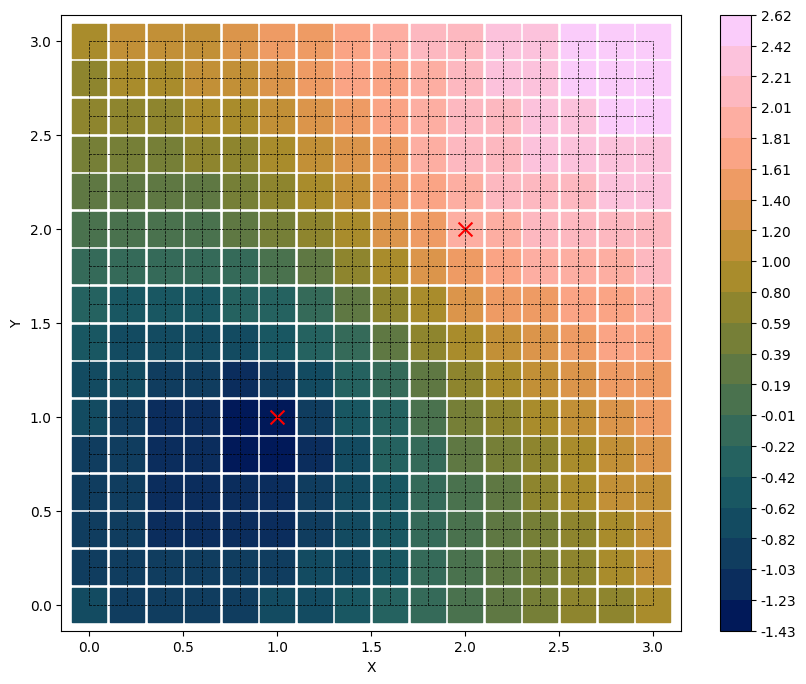

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.ndimage import zoom
import cmcrameri as cmc

# 定义 RBF 函数
def rbf(r, epsilon=1.0, function='multiquadric'):
    if function == 'multiquadric':
        return np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'inverse_multiquadric':
        return 1.0 / np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'gaussian':
        return np.exp(-(epsilon * r) ** 2)
    elif function == 'linear':
        return r
    elif function == 'cubic':
        return r ** 3
    elif function == 'quintic':
        return r ** 5
    else:
        raise ValueError(f"Unknown RBF function: {function}")

# 定义距离函数
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# RBF 插值函数
def rbf_interpolation(x, y, z, xi, yi, epsilon=1.0, function='multiquadric', lambda_2=10):
    n = len(x)
    # 构造距离矩阵 A
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = rbf(distance(x[i], y[i], x[j], y[j]), epsilon, function)

    # 构造扩展矩阵
    D_matrix = np.array([[1] for _ in range(n)])  # 假设 drift 是常数
    A = np.block([
        [A, D_matrix],
        [D_matrix.T, np.zeros((1, 1))]
    ])

    # 添加正则化项
    regularization = np.eye(n + 1)  # 对整个系统进行正则化
    regularization[-1, -1] *= lambda_2  # drift 的权重部分

    # 设置右侧的值
    b = np.concatenate((z, [0]))  # drift 部分为零

    # 求解正则化权重
    weights = np.linalg.solve(A + regularization, b)
    print(weights)
    # 插值计算
    zi = np.zeros_like(xi, dtype=float)
    for i in range(len(xi)):
        for j in range(n):
            r = distance(xi[i], yi[i], x[j], y[j])
            zi[i] += weights[j] * rbf(r, epsilon, function)
        zi[i] += weights[-1]  # drift 的贡献

    return zi



# 原始数据
D = np.array([
    [0, 0, 0, 0],
    [1, 1, 1, 1],
    [2, 2, 2, 2],
    [3, 3, 3, 3]
])

# 使用 zoom 函数进行插值
zoom_factor = 16 / 4  # 缩放因子
D_zoom = zoom(D, zoom_factor, order=3)  # order=3 表示三次样条插值

# 生成一些随机数据点
np.random.seed(0)
x = np.array([1, 2])
y = np.array([1, 2])
z = np.array([0, 1])

# 生成网格来绘制插值结果
xx = np.arange(0, 3.2, 0.2)
yy = np.arange(0, 3.2, 0.2)
grid_x, grid_y = np.meshgrid(xx, yy)
grid_x_flat = grid_x.flatten()
grid_y_flat = grid_y.flatten()

# 使用自定义 RBF 插值
interpolated_z_flat = rbf_interpolation(x, y, z, grid_x_flat, grid_y_flat, epsilon=1.0, function='linear')
interpolated_z = interpolated_z_flat.reshape(grid_x.shape)

# 定义明确的离散颜色级别
# levels = [0, 1, 2, 3, 4]  # 确保包含所有可能的级别
levels = np.linspace(np.unique(interpolated_z).min(), np.unique(interpolated_z).max(), 21) 
# levels = np.linspace(0, 2, 21) # 将 0 到 3 分为 10 段
cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 使用 cmcrameri 中的 batlow 颜色映射
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=len(levels) - 1)  # 设置边界

# 创建图形
plt.figure(figsize=(10, 8))

# 绘制网格线
for x_ in xx:
    plt.plot([x_, x_], [yy[0], yy[-1]], color='black', linestyle='--', linewidth=0.5)
for y_ in yy:
    plt.plot([xx[0], xx[-1]], [y_, y_], color='black', linestyle='--', linewidth=0.5)

# 绘制顶点并根据标量值着色
for i in range(interpolated_z.shape[0]):
    for j in range(interpolated_z.shape[1]):
        value = interpolated_z[i, j]
        color = cmap(norm(value))
        plt.scatter(grid_x[i, j], grid_y[i, j], color=color, s=600, marker='s')  # 使用 cmap 颜色映射

# 添加离散颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, boundaries=levels, ticks=levels)
cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
# 标注原始数据点
plt.scatter(x, y, c='r', label='Data Points', marker='x', s=100)

# 设置坐标范围和标签
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel('X')
plt.ylabel('Y')

# 设置坐标轴比例相等
plt.axis('equal')
print(interpolated_z[5,5])
print(interpolated_z[10,10])
# 显示图形
plt.show()


[ 0.70710678  0.         10.        ]


C:\Users\jya\AppData\Local\Temp\ipykernel_36552\4012197387.py:94: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 使用 cmcrameri 中的 batlow 颜色映射


10.0
11.0


C:\Users\jya\AppData\Local\Temp\ipykernel_36552\4012197387.py:116: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, boundaries=levels, ticks=levels)


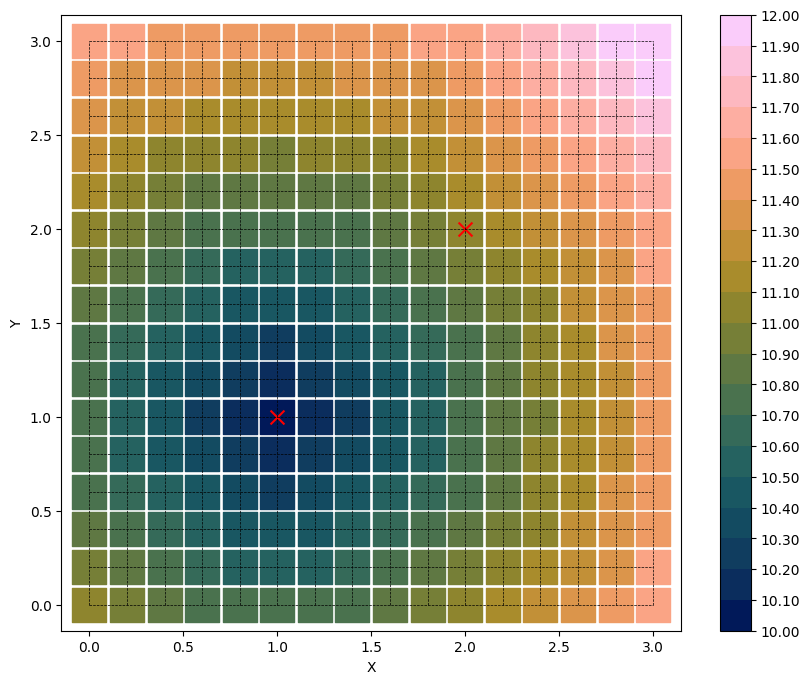

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.ndimage import zoom
import cmcrameri as cmc

# 定义 RBF 函数
def rbf(r, epsilon=1.0, function='multiquadric'):
    if function == 'multiquadric':
        return np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'inverse_multiquadric':
        return 1.0 / np.sqrt(1 + (epsilon * r) ** 2)
    elif function == 'gaussian':
        return np.exp(-(epsilon * r) ** 2)
    elif function == 'linear':
        return r
    elif function == 'cubic':
        return r ** 3
    elif function == 'quintic':
        return r ** 5
    else:
        raise ValueError(f"Unknown RBF function: {function}")

# 定义距离函数
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# RBF 插值函数
def rbf_interpolation(x, y, z, xi, yi, epsilon=1.0, function='multiquadric', lambda_2=10.0):
    n = len(x)
    # 构造距离矩阵 A
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = rbf(distance(x[i], y[i], x[j], y[j]), epsilon, function)

    # 计算插值部分的权重
    weights_interpolation = np.linalg.solve(A, z)

    # 构造 drift 权重
    weights_drift = np.zeros(n + 1)
    weights_drift[-1] = lambda_2  # drift 的权重

    # 合并权重
    weights = np.concatenate((weights_interpolation, [weights_drift[-1]]))
    print(weights)
    # 插值计算
    zi = np.zeros_like(xi, dtype=float)
    for i in range(len(xi)):
        for j in range(n):
            r = distance(xi[i], yi[i], x[j], y[j])
            zi[i] += weights[j] * rbf(r, epsilon, function)
        zi[i] += weights[-1]  # drift 的贡献

    return zi




# 原始数据
D = np.array([
    [0, 0, 0, 0],
    [1, 1, 1, 1],
    [2, 2, 2, 2],
    [3, 3, 3, 3]
])

# 使用 zoom 函数进行插值
zoom_factor = 16 / 4  # 缩放因子
D_zoom = zoom(D, zoom_factor, order=3)  # order=3 表示三次样条插值

# 生成一些随机数据点
np.random.seed(0)
x = np.array([1, 2])
y = np.array([1, 2])
z = np.array([0, 1])

# 生成网格来绘制插值结果
xx = np.arange(0, 3.2, 0.2)
yy = np.arange(0, 3.2, 0.2)
grid_x, grid_y = np.meshgrid(xx, yy)
grid_x_flat = grid_x.flatten()
grid_y_flat = grid_y.flatten()

# 使用自定义 RBF 插值
interpolated_z_flat = rbf_interpolation(x, y, z, grid_x_flat, grid_y_flat, epsilon=1.0, function='linear')
interpolated_z = interpolated_z_flat.reshape(grid_x.shape)

# 定义明确的离散颜色级别
# levels = [0, 1, 2, 3, 4]  # 确保包含所有可能的级别
levels = np.linspace(np.unique(interpolated_z).min(), np.unique(interpolated_z).max(), 21) 
# levels = np.linspace(0, 2, 21) # 将 0 到 3 分为 10 段
cmap = cm.get_cmap('cmc.batlow', len(levels) - 1)  # 使用 cmcrameri 中的 batlow 颜色映射
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=len(levels) - 1)  # 设置边界

# 创建图形
plt.figure(figsize=(10, 8))

# 绘制网格线
for x_ in xx:
    plt.plot([x_, x_], [yy[0], yy[-1]], color='black', linestyle='--', linewidth=0.5)
for y_ in yy:
    plt.plot([xx[0], xx[-1]], [y_, y_], color='black', linestyle='--', linewidth=0.5)

# 绘制顶点并根据标量值着色
for i in range(interpolated_z.shape[0]):
    for j in range(interpolated_z.shape[1]):
        value = interpolated_z[i, j]
        color = cmap(norm(value))
        plt.scatter(grid_x[i, j], grid_y[i, j], color=color, s=600, marker='s')  # 使用 cmap 颜色映射

# 添加离散颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, boundaries=levels, ticks=levels)
cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
# 标注原始数据点
plt.scatter(x, y, c='r', label='Data Points', marker='x', s=100)

# 设置坐标范围和标签
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel('X')
plt.ylabel('Y')

# 设置坐标轴比例相等
plt.axis('equal')
print(interpolated_z[5,5])
print(interpolated_z[10,10])
# 显示图形
plt.show()


In [4]:
no_noise = np.load('fold_scalar.npy')
no_noise

array([[[-17.3943778 , -14.5400217 , -19.04230875, ..., -18.99779399,
         -14.50836759, -17.36792671],
        [-14.22845852, -10.54973382, -16.19776692, ..., -16.13696398,
         -10.49340837, -14.18674619],
        [-14.22367589, -10.54328259, -16.18557001, ..., -16.11791894,
         -10.47386219, -14.17229471],
        ...,
        [-14.14619748, -10.43852264, -16.08102738, ..., -16.07868956,
         -10.43650264, -14.14470698],
        [-14.15894587, -10.45579265, -16.09802876, ..., -16.09616582,
         -10.45400445, -14.15762541],
        [-17.34526777, -14.48123496, -18.96467132, ..., -18.96334737,
         -14.48006374, -17.34428996]],

       [[-16.11699373, -12.98481185, -17.2547321 , ..., -17.21116497,
         -12.95777641, -16.09522034],
        [-12.63603807,  -8.27751834, -14.0540637 , ..., -13.99207272,
          -8.22275202, -12.60023012],
        [-12.63192824,  -8.27124313, -14.04148523, ..., -13.97321201,
          -8.20374629, -12.58783545],
        ...,


In [23]:
from noise import pnoise3
no_noise.shape
Nx, Ny, Nz = no_noise.shape
# 设置噪声参数
scale = 0.1      # 控制噪声频率
amplitude = 10  # 控制噪声强度

# 创建坐标网格
x = np.linspace(0, Nx * scale, Nx)
y = np.linspace(0, Ny * scale, Ny)
z = np.linspace(0, Nz * scale, Nz)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# 向量化计算Perlin噪声
noise = np.vectorize(pnoise3)(X, Y, Z)

# 调整噪声强度
noise *= amplitude
noise

array([[[ 0.        ,  1.09255783,  2.40244463, ..., -1.42979145,
         -0.92975736,  0.        ],
        [ 0.        ,  1.0734877 ,  2.36386225, ..., -0.62801003,
         -0.01906931,  0.9297587 ],
        [ 0.        ,  0.96344993,  2.13856876, ..., -0.26387691,
          0.46031892,  1.42978936],
        ...,
        [-0.48632503, -1.58630505, -2.94641823, ...,  2.07913667,
          2.353912  ,  2.4024421 ],
        [-0.08140028, -1.18164852, -2.53681242, ...,  0.9546335 ,
          1.07201189,  1.09255791],
        [ 0.        , -1.09255783, -2.40244463, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.9297587 ,  1.98417634,  3.16507816, ..., -1.33241713,
         -0.8329767 ,  0.08139959],
        [ 0.92902079,  1.96474105,  3.12704533, ..., -0.53725362,
          0.06955266,  1.00273006],
        [ 0.92535019,  1.85316563,  2.90543824, ..., -0.17268866,
          0.54514825,  1.49822801],
        ...,
        [-1.50274277, -2.59100348, -3.89029443, ...,  

In [24]:
with_noise = no_noise + noise   
with_noise

array([[[-17.3943778 , -13.44746387, -16.63986412, ..., -20.42758544,
         -15.43812494, -17.36792671],
        [-14.22845852,  -9.47624612, -13.83390467, ..., -16.76497401,
         -10.51247768, -13.25698749],
        [-14.22367589,  -9.57983266, -14.04700125, ..., -16.38179586,
         -10.01354326, -12.74250535],
        ...,
        [-14.6325225 , -12.02482769, -19.0274456 , ..., -13.99955289,
          -8.08259064, -11.74226488],
        [-14.24034614, -11.63744117, -18.63484118, ..., -15.14153231,
          -9.38199256, -13.0650675 ],
        [-17.34526777, -15.57379279, -21.36711595, ..., -18.96334737,
         -14.48006374, -17.34428996]],

       [[-15.18723504, -11.00063551, -14.08965394, ..., -18.5435821 ,
         -13.79075311, -16.01382075],
        [-11.70701727,  -6.31277728, -10.92701837, ..., -14.52932634,
          -8.15319936, -11.59750006],
        [-11.70657805,  -6.4180775 , -11.13604698, ..., -14.14590068,
          -7.65859803, -11.08960744],
        ...,


In [26]:
np.save('fold_scalar_noise.npy', with_noise)
np.save('noise.npy', noise)

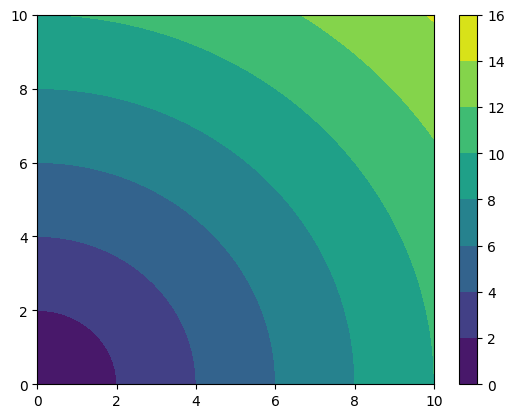

In [82]:

x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
x, y = np.meshgrid(x, y)
z = np.sqrt(x**2 + y**2)
z = z.reshape(100,100)
plt.contourf(x, y, z, cmap='viridis')
plt.colorbar()

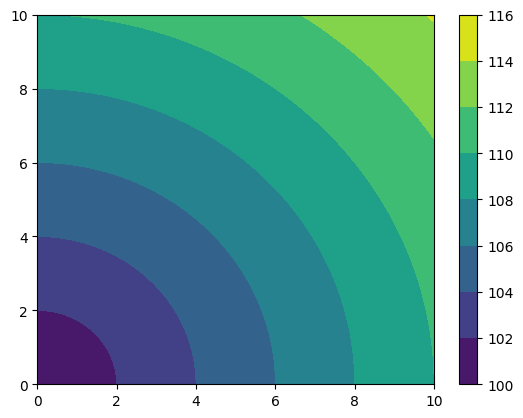

In [81]:

x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
x, y = np.meshgrid(x, y)
z = np.sqrt(x**2 + y**2) +100
z = z.reshape(100,100)
plt.contourf(x, y, z, cmap='viridis')
plt.colorbar()